<h2><a href="https://leetcode.com/problems/continuous-subarrays">2762. Continuous Subarrays</a></h2><h3>Medium</h3><hr><p>You are given a <strong>0-indexed</strong> integer array <code>nums</code>. A subarray of <code>nums</code> is called <strong>continuous</strong> if:</p>

<ul>
	<li>Let <code>i</code>, <code>i + 1</code>, ..., <code>j</code><sub> </sub>be the indices in the subarray. Then, for each pair of indices <code>i &lt;= i<sub>1</sub>, i<sub>2</sub> &lt;= j</code>, <code><font face="monospace">0 &lt;=</font> |nums[i<sub>1</sub>] - nums[i<sub>2</sub>]| &lt;= 2</code>.</li>
</ul>

<p>Return <em>the total number of <strong>continuous</strong> subarrays.</em></p>

<p>A subarray is a contiguous <strong>non-empty</strong> sequence of elements within an array.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> nums = [5,4,2,4]
<strong>Output:</strong> 8
<strong>Explanation:</strong> 
Continuous subarray of size 1: [5], [4], [2], [4].
Continuous subarray of size 2: [5,4], [4,2], [2,4].
Continuous subarray of size 3: [4,2,4].
Thereare no subarrys of size 4.
Total continuous subarrays = 4 + 3 + 1 = 8.
It can be shown that there are no more continuous subarrays.
</pre>

<p>&nbsp;</p>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> nums = [1,2,3]
<strong>Output:</strong> 6
<strong>Explanation:</strong> 
Continuous subarray of size 1: [1], [2], [3].
Continuous subarray of size 2: [1,2], [2,3].
Continuous subarray of size 3: [1,2,3].
Total continuous subarrays = 3 + 2 + 1 = 6.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= nums.length &lt;= 10<sup>5</sup></code></li>
	<li><code>1 &lt;= nums[i] &lt;= 10<sup>9</sup></code></li>
</ul>


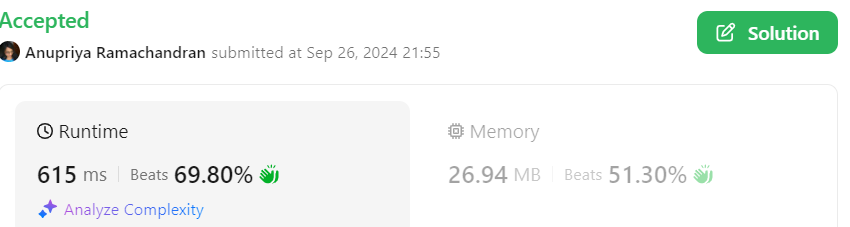

In [3]:
from collections import deque
from typing import List

class Solution:
    def continuousSubarrays(self, nums: List[int]) -> int:
        minque = deque()
        maxque = deque()

        n = len(nums)
        start = 0
        count = 0
        for end in range(n):

            while minque and nums[minque[-1]] >= nums[end]:
                minque.pop()
            minque.append(end)

            while maxque and nums[maxque[-1]] <= nums[end]:
                maxque.pop()
            maxque.append(end)

            while maxque and minque and nums[maxque[0]] - nums[minque[0]] > 2:
                start += 1
                if minque[0] < start:
                    minque.popleft()
                if maxque[0] < start:
                    maxque.popleft()

            count += (end- start + 1)  # To count all subarrays, instead of adding 1, you need to add end-start + 1
        return count